In [1]:
##LOAD PACKAGES

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## LOAD DATABASE AND SHOW COLUMNS FOR COLUMNS SELECTION
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/listings_proc2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      3560 non-null   int64  
 1   host_yrs_exp                 3560 non-null   int64  
 2   host_is_superhost.f          3560 non-null   int64  
 3   host_is_superhost.t          3560 non-null   int64  
 4   neighbourhood                2720 non-null   object 
 5   neighbourhood_cleansed       3560 non-null   object 
 6   latitude                     3560 non-null   float64
 7   longitude                    3560 non-null   float64
 8   property_type                3560 non-null   object 
 9   room_entire                  3560 non-null   int64  
 10  room_hotel                   3560 non-null   int64  
 11  room_private                 3560 non-null   int64  
 12  room_shared                  3560 non-null   int64  
 13  accommodates      

In [5]:
## SHOW CORRELATION WITH PRICE
corr = df.corr()
corr["log_price"].sort_values(ascending=False).head(10)

log_price           1.000000
price               0.763818
accommodates        0.628797
bedrooms            0.600038
beds                0.483131
n_bathrooms         0.468728
room_entire         0.416783
entire_prop         0.347475
bathroom_private    0.337145
availability_30     0.168142
Name: log_price, dtype: float64

In [6]:
df.columns

Index(['host_id', 'host_yrs_exp', 'host_is_superhost.f', 'host_is_superhost.t',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_entire', 'room_hotel', 'room_private',
       'room_shared', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'n_bathrooms', 'bathro

In [7]:
## DROP UNWANTED COLUNS, THE VARIABLE TO KEEP HAVE TO BE PRESENT IN LIST "variable_keep"

variables = ['host_id', 'host_yrs_exp', 'host_is_superhost.f', 'host_is_superhost.t',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_entire', 'room_hotel', 'room_private',
       'room_shared', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'n_bathrooms', 'bathroom_private', 'bathroom_shared', 'log_price',
       'amenity_qty', 'fNBHD', 'entire_prop', 'has_wifi', 'has_parking',
       'has_heating', 'has_ac', 'has_tv', 'has_fridge']
variable_keep = [ 'accommodates', 'bedrooms',
       'n_bathrooms', 'bathroom_private','room_private' ,  'log_price',
         'has_parking',
       'has_heating', 'has_ac', 'has_tv',  'host_yrs_exp', 'number_of_reviews']
for i in variable_keep:
    print(str(i))
    variables.remove(i)

df = df.drop(variables, axis=1)

accommodates
bedrooms
n_bathrooms
bathroom_private
room_private
log_price
has_parking
has_heating
has_ac
has_tv
host_yrs_exp
number_of_reviews


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   host_yrs_exp       3560 non-null   int64  
 1   room_private       3560 non-null   int64  
 2   accommodates       3560 non-null   int64  
 3   bedrooms           3560 non-null   int64  
 4   number_of_reviews  3560 non-null   int64  
 5   n_bathrooms        3560 non-null   float64
 6   bathroom_private   3560 non-null   int64  
 7   log_price          3560 non-null   float64
 8   has_parking        3560 non-null   int64  
 9   has_heating        3560 non-null   int64  
 10  has_ac             3560 non-null   int64  
 11  has_tv             3560 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 333.9 KB


In [9]:
##DROPNA VALUES FOR HOST RESPONSE TIME AND HOST ACCEPTANCE RATE, THIS CAN BE FILLED
#df = df.dropna(axis = 0, subset = ['host_response_time'])
#df = df.dropna(axis = 0, subset = ['host_acceptance_rate'])
df = df.dropna(axis = 0, subset = ['review_scores_rating'])
df = df.dropna(axis = 0, subset = ['review_scores_accuracy'])
df = df.dropna(axis = 0, subset = ['review_scores_cleanliness'])
df = df.dropna(axis = 0, subset = ['review_scores_checkin'])
df = df.dropna(axis = 0, subset = ['review_scores_communication'])
df = df.dropna(axis = 0, subset = ['review_scores_location'])
df = df.dropna(axis = 0, subset = ['review_scores_value'])


KeyError: ignored

In [ ]:
df.info()

In [ ]:
print('UNIQUE VALUES\n')
for col in df.columns:
    print(f'{col}: {len(df[col].unique())}\n')

In [10]:
#Converting categorical data to numerical
df = pd.get_dummies(df)
df.head()

,host_yrs_exp,room_private,accommodates,bedrooms,number_of_reviews,n_bathrooms,bathroom_private,log_price,has_parking,has_heating,has_ac,has_tv
0,13,0,2,1,85,1.0,1,4.595120,1,1,1,1
1,13,0,3,2,159,1.0,1,4.905275,1,1,1,1
2,13,0,3,1,87,1.5,1,5.187386,1,1,1,1
3,13,1,3,1,624,1.0,0,4.007333,1,1,0,0
4,13,1,2,1,156,1.0,0,3.951244,1,1,1,0


In [11]:
## MODEL RUN AND EVALUATE USING: default=”squared_error”
## INFO ABOUT MODEL : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
## SPLIT 80 - 20
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

train, test = train_test_split(df, test_size=0.2, random_state = 1)
y_train = train["log_price"]
y_test = test["log_price"]
x_train = train.drop("log_price", axis = 1)
x_test = test.drop("log_price", axis = 1)

#Printing thier shapes
print(x_train.shape, y_test.shape)
print(y_train.shape, y_test.shape)

#x_train, x_test, y_train, y_test = train_test_split(train, y_train, test_size=0.2, random_state=42)
estimator = [5, 10, 20, 30, 40, 50, 70, 90, 100, 150, 200, 250, 300, 400, 500, 600, 800, 1000]
results = []
name = []
for i in estimator:
  name.append("cfl" + str(i))
  print(name)

(2848, 11) (712,)
(2848,) (712,)
['cfl5']
['cfl5', 'cfl10']
['cfl5', 'cfl10', 'cfl20']
['cfl5', 'cfl10', 'cfl20', 'cfl30']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100', 'cfl150']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100', 'cfl150', 'cfl200']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100', 'cfl150', 'cfl200', 'cfl250']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100', 'cfl150', 'cfl200', 'cfl250', 'cfl300']
['cfl5', 'cfl10', 'cfl20', 'cfl30', 'cfl40', 'cfl50', 'cfl70', 'cfl90', 'cfl100', 'cfl150', 'cfl200', 'cfl250', 'cfl300', 'cfl400']
[

In [12]:
j = 0
for i in estimator:
  print(name[j])
  name[j] = RandomForestRegressor(n_estimators=i, verbose = 0)
  name[j].fit(x_train, y_train)
  result = mean_squared_error(name[j].predict(x_test),y_test)
  results.append(result)
  print(mean_squared_error(name[j].predict(x_test),y_test))
  j = j + 1

##Different Metrics https://scikit-learn.org/stable/modules/model_evaluation.html



cfl5
0.2651933980438134
cfl10
0.25396508739195506
cfl20
0.24207340155334203
cfl30
0.23238089089702865
cfl40
0.23289056423748705
cfl50
0.22917258940792135
cfl70
0.23133556044701992
cfl90
0.23252522505926823
cfl100
0.23230218964115523
cfl150
0.22783414600309573
cfl200
0.22825265472861206
cfl250
0.22816169720471746
cfl300
0.22899159970944857
cfl400
0.2276021890632666
cfl500
0.22752110520064486
cfl600
0.2268233193703541
cfl800
0.2282029392825038
cfl1000
0.2276203539183288


In [13]:
coeff_determination(y_true, y_pred)

NameError: ignored

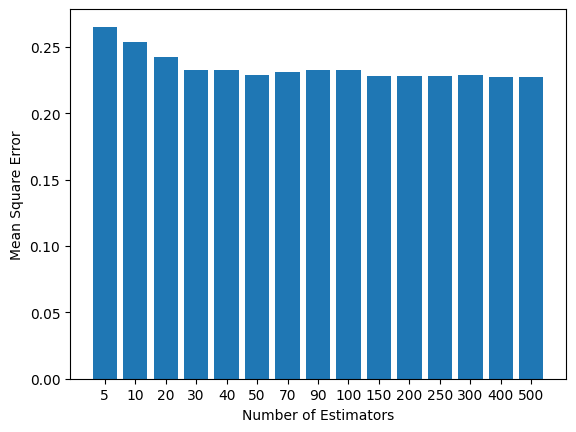

In [14]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = estimator[0:15]
y_pos = np.arange(len(objects))
performance = results[0:15]

plt.bar(y_pos, performance, align='center', alpha=1, width = 0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Square Error')
plt.xlabel('Number of Estimators')


plt.show()

In [15]:
##Different Metrics https://scikit-learn.org/stable/modules/model_evaluation.html

print("Mean Squared Error:")
print(mean_squared_error(name[8].predict(x_test),y_test))
print("R2 Score")
print(r2_score(name[8].predict(x_test),y_test))
print(coeff_determination(name[8].predict(x_test),y_test))

Mean Squared Error:
0.23230218964115523
R2 Score
0.18959399544946176


NameError: ignored

In [16]:
#Making an prediction
#prediction = clf.predict(test)
#print(prediction)

In [17]:
#imports
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from scipy import ndimage, misc
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.convolutional import Conv2D, Conv2DTranspose, Conv1D, SeparableConv2D, DepthwiseConv2D
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import pickle
import time
from keras.callbacks import TensorBoard
import cv2
import keras.backend as K
from keras.layers import LeakyReLU
from scipy import stats 

from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

#model.compile(optimizer='adam', loss='mean_squared_error', metrics=[coeff_determination])


In [18]:

nombre_h5 = 'AirSavings.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model = Sequential()

model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])


In [19]:

nombre_h5_dropout = 'AirSavings_dropout.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5_dropout, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model2 = Sequential()

model2.add(Dense(50, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(50, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1))

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])

In [20]:

nombre_h5_bn = 'AirSavings_bn.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5_bn, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model3 = Sequential()

model3.add(Dense(50, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(100, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(50, activation='relu'))
model3.add(Dense(1))

model3.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])

In [21]:

nombre_h5_bndo = 'AirSavings_bndo.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5_bndo, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model4 = Sequential()

model4.add(Dense(50, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(100, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(50, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(1))

model4.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])

In [22]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=400,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)



Epoch 1/400

Epoch 00001: val_loss improved from inf to 1.08731, saving model to AirSavings_bndo.h5
89/89 - 3s - loss: 5.9056 - coeff_determination: -1.3185e+01 - val_loss: 1.0873 - val_coeff_determination: -1.6532e+00 - 3s/epoch - 29ms/step
Epoch 2/400

Epoch 00002: val_loss did not improve from 1.08731
89/89 - 0s - loss: 2.6693 - coeff_determination: -5.1937e+00 - val_loss: 7.7298 - val_coeff_determination: -1.8559e+01 - 271ms/epoch - 3ms/step
Epoch 3/400

Epoch 00003: val_loss improved from 1.08731 to 0.43314, saving model to AirSavings_bndo.h5
89/89 - 0s - loss: 0.9250 - coeff_determination: -1.0373e+00 - val_loss: 0.4331 - val_coeff_determination: -8.1611e-02 - 294ms/epoch - 3ms/step
Epoch 4/400

Epoch 00004: val_loss did not improve from 0.43314
89/89 - 0s - loss: 0.6702 - coeff_determination: -5.6122e-01 - val_loss: 0.5017 - val_coeff_determination: -2.0810e-01 - 274ms/epoch - 3ms/step
Epoch 5/400

Epoch 00005: val_loss did not improve from 0.43314
89/89 - 0s - loss: 0.4016 - co

In [23]:
history2 = model2.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=400,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)

Epoch 1/400

Epoch 00001: val_loss did not improve from 0.21018
89/89 - 1s - loss: 179.1976 - coeff_determination: -4.3086e+02 - val_loss: 13.1925 - val_coeff_determination: -3.2160e+01 - 1s/epoch - 12ms/step
Epoch 2/400

Epoch 00002: val_loss did not improve from 0.21018
89/89 - 0s - loss: 55.2560 - coeff_determination: -1.2806e+02 - val_loss: 11.1284 - val_coeff_determination: -2.7239e+01 - 279ms/epoch - 3ms/step
Epoch 3/400

Epoch 00003: val_loss did not improve from 0.21018
89/89 - 0s - loss: 27.5344 - coeff_determination: -6.2539e+01 - val_loss: 9.7482 - val_coeff_determination: -2.3659e+01 - 294ms/epoch - 3ms/step
Epoch 4/400

Epoch 00004: val_loss did not improve from 0.21018
89/89 - 0s - loss: 22.0290 - coeff_determination: -5.4477e+01 - val_loss: 10.2359 - val_coeff_determination: -2.4940e+01 - 269ms/epoch - 3ms/step
Epoch 5/400

Epoch 00005: val_loss did not improve from 0.21018
89/89 - 0s - loss: 17.8838 - coeff_determination: -4.1372e+01 - val_loss: 9.5843 - val_coeff_deter

In [24]:
history3 = model3.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=400,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)

Epoch 1/400

Epoch 00001: val_loss did not improve from 0.21018
89/89 - 2s - loss: 2.2717 - coeff_determination: -4.0580e+00 - val_loss: 8.2219 - val_coeff_determination: -1.9574e+01 - 2s/epoch - 18ms/step
Epoch 2/400

Epoch 00002: val_loss did not improve from 0.21018
89/89 - 0s - loss: 0.4420 - coeff_determination: 0.0044 - val_loss: 2.7737 - val_coeff_determination: -5.8614e+00 - 338ms/epoch - 4ms/step
Epoch 3/400

Epoch 00003: val_loss did not improve from 0.21018
89/89 - 0s - loss: 0.3818 - coeff_determination: 0.1460 - val_loss: 0.9543 - val_coeff_determination: -1.3429e+00 - 334ms/epoch - 4ms/step
Epoch 4/400

Epoch 00004: val_loss did not improve from 0.21018
89/89 - 0s - loss: 0.3582 - coeff_determination: 0.1931 - val_loss: 0.4734 - val_coeff_determination: -1.3160e-01 - 332ms/epoch - 4ms/step
Epoch 5/400

Epoch 00005: val_loss did not improve from 0.21018
89/89 - 0s - loss: 0.3478 - coeff_determination: 0.2163 - val_loss: 0.2738 - val_coeff_determination: 0.3536 - 333ms/epoc

In [25]:
history4 = model4.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=400,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)

Epoch 1/400

Epoch 00001: val_loss did not improve from 0.21018
89/89 - 2s - loss: 16.3728 - coeff_determination: -3.6985e+01 - val_loss: 7.5409 - val_coeff_determination: -1.7713e+01 - 2s/epoch - 18ms/step
Epoch 2/400

Epoch 00002: val_loss did not improve from 0.21018
89/89 - 0s - loss: 6.4809 - coeff_determination: -1.4264e+01 - val_loss: 2.8377 - val_coeff_determination: -6.0953e+00 - 350ms/epoch - 4ms/step
Epoch 3/400

Epoch 00003: val_loss did not improve from 0.21018
89/89 - 0s - loss: 5.3588 - coeff_determination: -1.1406e+01 - val_loss: 1.4619 - val_coeff_determination: -2.6179e+00 - 362ms/epoch - 4ms/step
Epoch 4/400

Epoch 00004: val_loss did not improve from 0.21018
89/89 - 0s - loss: 4.4158 - coeff_determination: -9.4954e+00 - val_loss: 1.5098 - val_coeff_determination: -2.7169e+00 - 346ms/epoch - 4ms/step
Epoch 5/400

Epoch 00005: val_loss did not improve from 0.21018
89/89 - 0s - loss: 3.6559 - coeff_determination: -7.4165e+00 - val_loss: 1.2081 - val_coeff_determination

dict_keys(['loss', 'coeff_determination', 'val_loss', 'val_coeff_determination'])


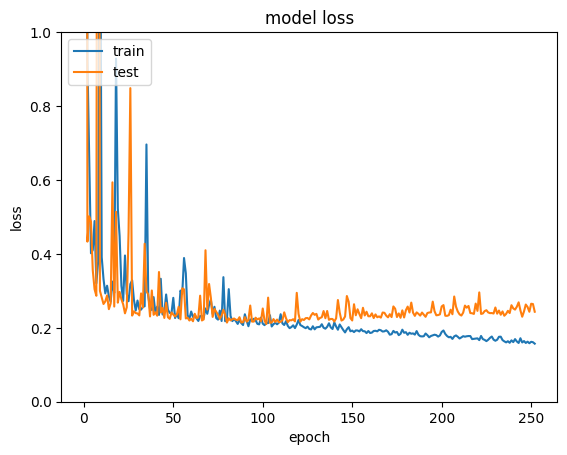

dict_keys(['loss', 'coeff_determination', 'val_loss', 'val_coeff_determination'])


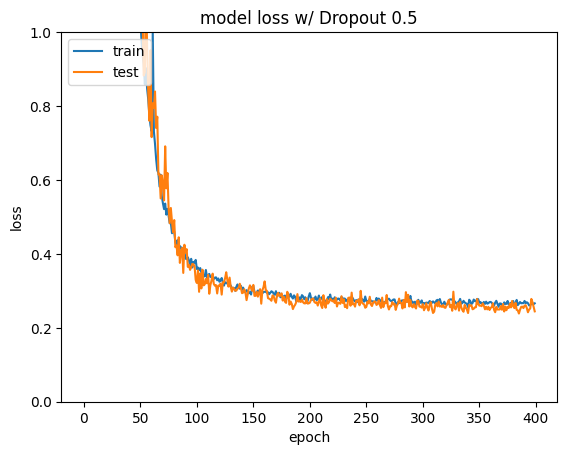

dict_keys(['loss', 'coeff_determination', 'val_loss', 'val_coeff_determination'])


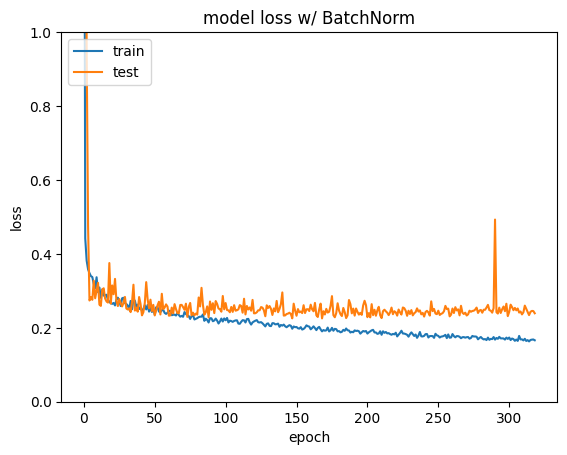

dict_keys(['loss', 'coeff_determination', 'val_loss', 'val_coeff_determination'])


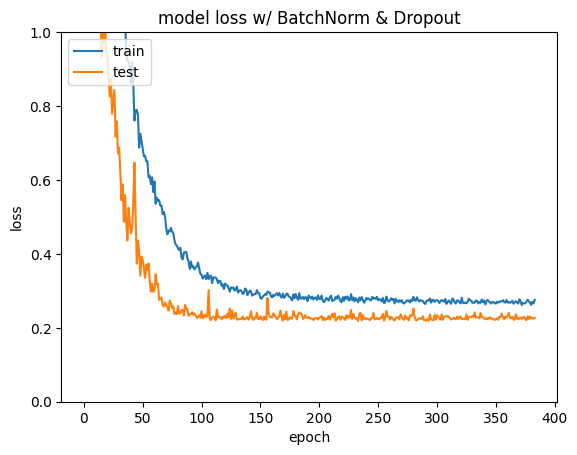

In [26]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss w/ Dropout 0.5')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

print(history3.history.keys())
# summarize history for accuracy
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss w/ BatchNorm')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

print(history4.history.keys())
# summarize history for accuracy
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss w/ BatchNorm & Dropout')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()




In [27]:
print(min(history.history['val_loss']))
print(min(history2.history['val_loss']))
print(min(history3.history['val_loss']))
print(min(history4.history['val_loss']))

0.21017539501190186
0.23860760033130646
0.22549794614315033
0.2181679606437683


In [28]:
print(max(history.history['val_coeff_determination']))
print(max(history2.history['val_coeff_determination']))
print(max(history3.history['val_coeff_determination']))
print(max(history4.history['val_coeff_determination']))

0.5071892738342285
0.4478880763053894
0.47362250089645386
0.49413344264030457


In [33]:


print(np.where(np.asarray(history.history['val_loss']) == 0.21017539501190186))
print(np.where(np.asarray(history2.history['val_loss']) == 0.23860760033130646))
print(np.where(np.asarray(history3.history['val_loss']) == 0.22549794614315033))
print(np.where(np.asarray(history4.history['val_loss']) == 0.2181679606437683))

(array([102]),)
(array([385]),)
(array([168]),)
(array([233]),)


In [34]:
print(history.history['val_coeff_determination'][102])
print(history2.history['val_coeff_determination'][385])
print(history3.history['val_coeff_determination'][168])
print(history4.history['val_coeff_determination'][233])

0.5071892738342285
0.4478880763053894
0.47362250089645386
0.49413344264030457


In [ ]:
nombre_h5 = 'AirSavings.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model = Sequential()

model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])


In [ ]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=200,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)



In [ ]:

nombre_h5_bndo = 'AirSavings_bndo.h5'
callbacks = [
             EarlyStopping(patience=150, verbose=1),
              ModelCheckpoint(nombre_h5_bndo, verbose=1, save_best_only=True, save_weights_only=True),
              ]

#build our model
model4 = Sequential()

model4.add(Dense(100, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(100, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(100, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(100, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(1))

model4.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])
history4 = model4.fit(
    x_train,
    y_train,
    validation_data = (x_test,y_test),
    epochs=400,
    shuffle=True,
    verbose=2,
    callbacks = callbacks
)